In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
X = df.iloc[ :, : -2].values
y = df.iloc[ :, -2].values

In [5]:
print(X)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.2    0.6    0.08  ...  3.45   0.58  10.5  ]
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]]


In [6]:
print(y)

[5 5 5 ... 5 6 5]


# Split the dataset using the train_test split function from Scikit learn

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
X_train.shape

(914, 11)

In [9]:
X_test.shape

(229, 11)

In [10]:
y_train.shape

(914,)

In [11]:
y_test.shape

(229,)

# Create The SVM Model

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

# Train the Model

In [13]:
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
y_pred=classifier.predict(X_test)

In [15]:
y_pred

array([6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5,
       5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 5, 6, 6, 6, 5, 6], dtype=int64)

In [16]:
acc=classifier.score(X_test, y_test)
acc

0.5982532751091703

In [17]:
y_pred = classifier.predict(X_test)

# Compute the Confusion matrix

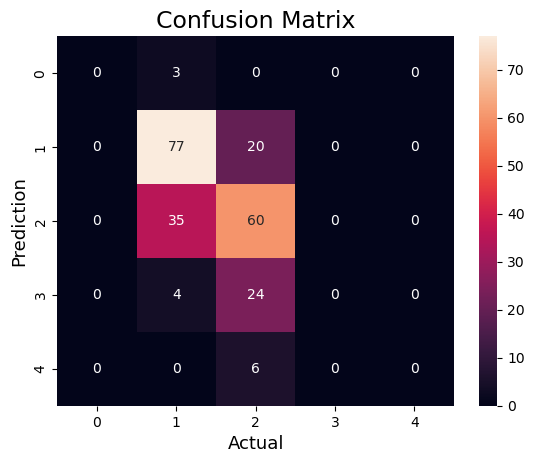

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix

sns.heatmap(cm,
           annot=True,
           fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Classification Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.65      0.79      0.71        97
           6       0.55      0.63      0.59        95
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00         6

    accuracy                           0.60       229
   macro avg       0.24      0.29      0.26       229
weighted avg       0.50      0.60      0.54       229



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
